In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("../Data/dataset_dk3619_preprocessed_v1.csv")

### Choose Feauture will use for Model

In [5]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
              'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
              'day_of_month', 'week_of_year', 'season', 'holiday', 'Consumption_MWh']

df_filter = df[df['DK3619Code'] == 'A_A']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [6]:
df_corr.columns

Index(['HourUTC', 'HourDK', 'hour', 'day_of_week', 'weekday_name', 'quarter',
       'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year',
       'season', 'holiday', 'Consumption_MWh'],
      dtype='object')

In [7]:
### Mapping data to numberic 

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


/var/folders/82/s1cgdl3s5hn10rsmff2gt35r0000gn/T/ipykernel_4494/3445385018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


In [8]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

/var/folders/82/s1cgdl3s5hn10rsmff2gt35r0000gn/T/ipykernel_4494/3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [9]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.drop(['HourUTC', 'HourDK'], axis=1)
correlation_matrix = df_corr.corr()

print(correlation_matrix)

                     hour  day_of_week  weekday_name   quarter     month  \
hour             1.000000     0.000016      0.000016 -0.000426 -0.000319   
day_of_week      0.000016     1.000000      1.000000  0.000564  0.001602   
weekday_name     0.000016     1.000000      1.000000  0.000564  0.001602   
quarter         -0.000426     0.000564      0.000564  1.000000  0.971198   
month           -0.000319     0.001602      0.001602  0.971198  1.000000   
year             0.000018    -0.000519     -0.000519 -0.120961 -0.121763   
day_of_year     -0.000321     0.001509      0.001509  0.968086  0.996492   
day_of_month    -0.000017    -0.000962     -0.000962  0.013639  0.011161   
week_of_year    -0.000321     0.000235      0.000235  0.947889  0.972474   
season          -0.000286     0.000106      0.000106  0.213887  0.206307   
holiday          0.000227     0.009781      0.009781 -0.050583 -0.052024   
Consumption_MWh  0.061940    -0.279271     -0.279271 -0.128351 -0.117870   

           

/var/folders/82/s1cgdl3s5hn10rsmff2gt35r0000gn/T/ipykernel_4494/4229419573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/var/folders/82/s1cgdl3s5hn10rsmff2gt35r0000gn/T/ipykernel_4494/4229419573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


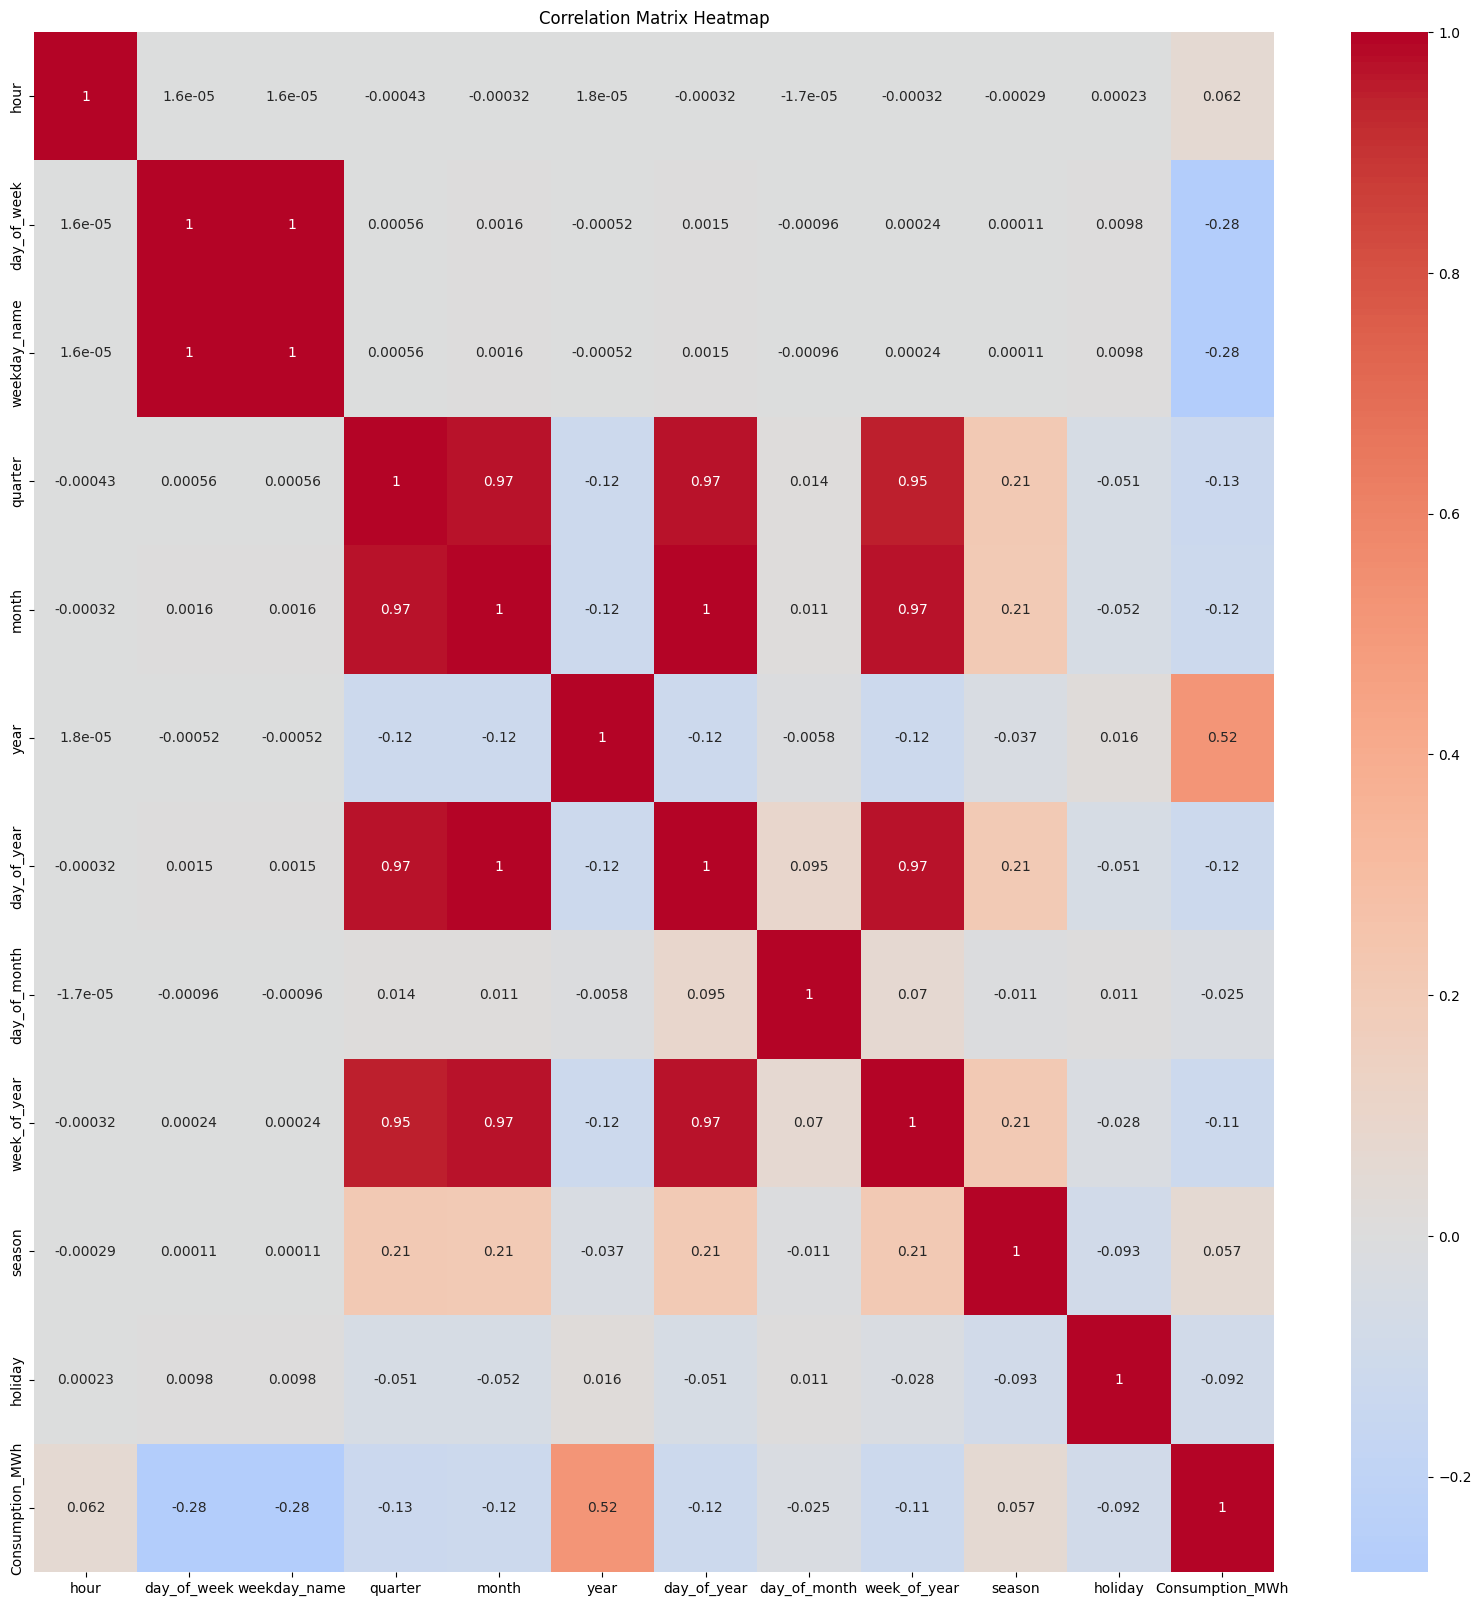

In [90]:
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Split data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU, Dense, Bidirectional
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [23]:
# Normalize the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_corr[['season', 'year', 'month', 'hour', 'Consumption_MWh']])

scaled_df = pd.DataFrame(scaled_df, columns=['season', 'year', 'month', 'hour', 'Consumption_MWh'])

In [24]:
# Create sequences
def create_sequences(df, seq_length):
    sequences = []
    labels = []
    for i in range(len(df) - seq_length):
        seq = df.iloc[i:i+seq_length].values
        label = df['Consumption_MWh'].iloc[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 24  # for 24 hours sequence
sequences, labels = create_sequences(scaled_df, SEQ_LENGTH)

In [26]:
labels

array([0.14845213, 0.14614699, 0.14893835, ..., 0.40813699, 0.43167281,
       0.47514127])

In [27]:


# Split the data into training (60%), validation (20%), and test (20%) sets
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, shuffle=False)


In [29]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
4226/4226 [==============================] - 100s 24ms/step - loss: 3.5008e-04 - val_loss: 1.1649e-04 - lr: 0.0010
Epoch 2/10
4226/4226 [==============================] - 126s 30ms/step - loss: 3.1988e-04 - val_loss: 1.3957e-04 - lr: 0.0010
Epoch 3/10
4226/4226 [==============================] - 83s 20ms/step - loss: 3.0082e-04 - val_loss: 1.1098e-04 - lr: 0.0010
Epoch 4/10
4226/4226 [==============================] - 142s 33ms/step - loss: 2.8925e-04 - val_loss: 1.2961e-04 - lr: 0.0010
Epoch 5/10
4226/4226 [==============================] - 107s 25ms/step - loss: 2.8298e-04 - val_loss: 9.4102e-05 - lr: 0.0010
Epoch 6/10
4226/4226 [==============================] - 92s 22ms/step - loss: 2.7343e-04 - val_loss: 1.3585e-04 - lr: 0.0010
Epoch 7/10
4226/4226 [==============================] - 110s 26ms/step - loss: 2.4545e-04 - val_loss: 9.7455e-05 - lr: 5.0000e-04
Epoch 8/10
4226/4226 [==============================] - 99s 23ms/step - loss: 2.4682e-04 - val_loss: 1.0137e-04 - lr

In [33]:
# Model Evaluation
predictions = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

661/661 [==============================] - 8s 10ms/step
R² Score: 0.9016157377178449
Mean Absolute Error (MAE): 0.021415992208099182
Mean Squared Error (MSE): 0.0016416129711372038
Root Mean Squared Error (RMSE): 0.040516823310042506


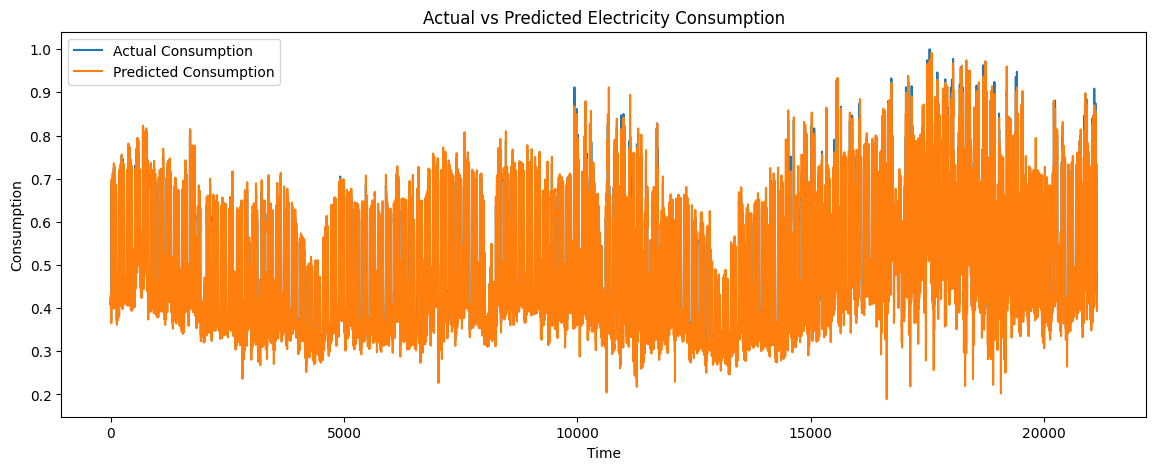

In [34]:
# Plot predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Consumption')
plt.plot(predictions, label='Predicted Consumption')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

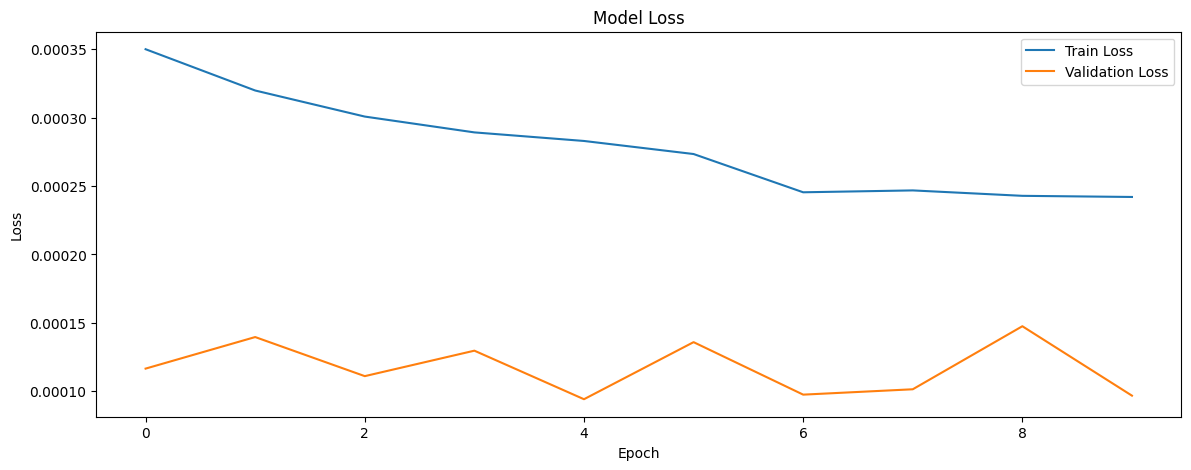

In [35]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()